# Binarization

We will use a new dataset that contains words. Check the folder 02-Datasets and the notebook `donwload-prepare-store-enron-data.ipynb` to get hold of the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer

In [2]:
# load the bag of words dataset

data = pd.read_csv("../../bag_of_words.csv")

data.head()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


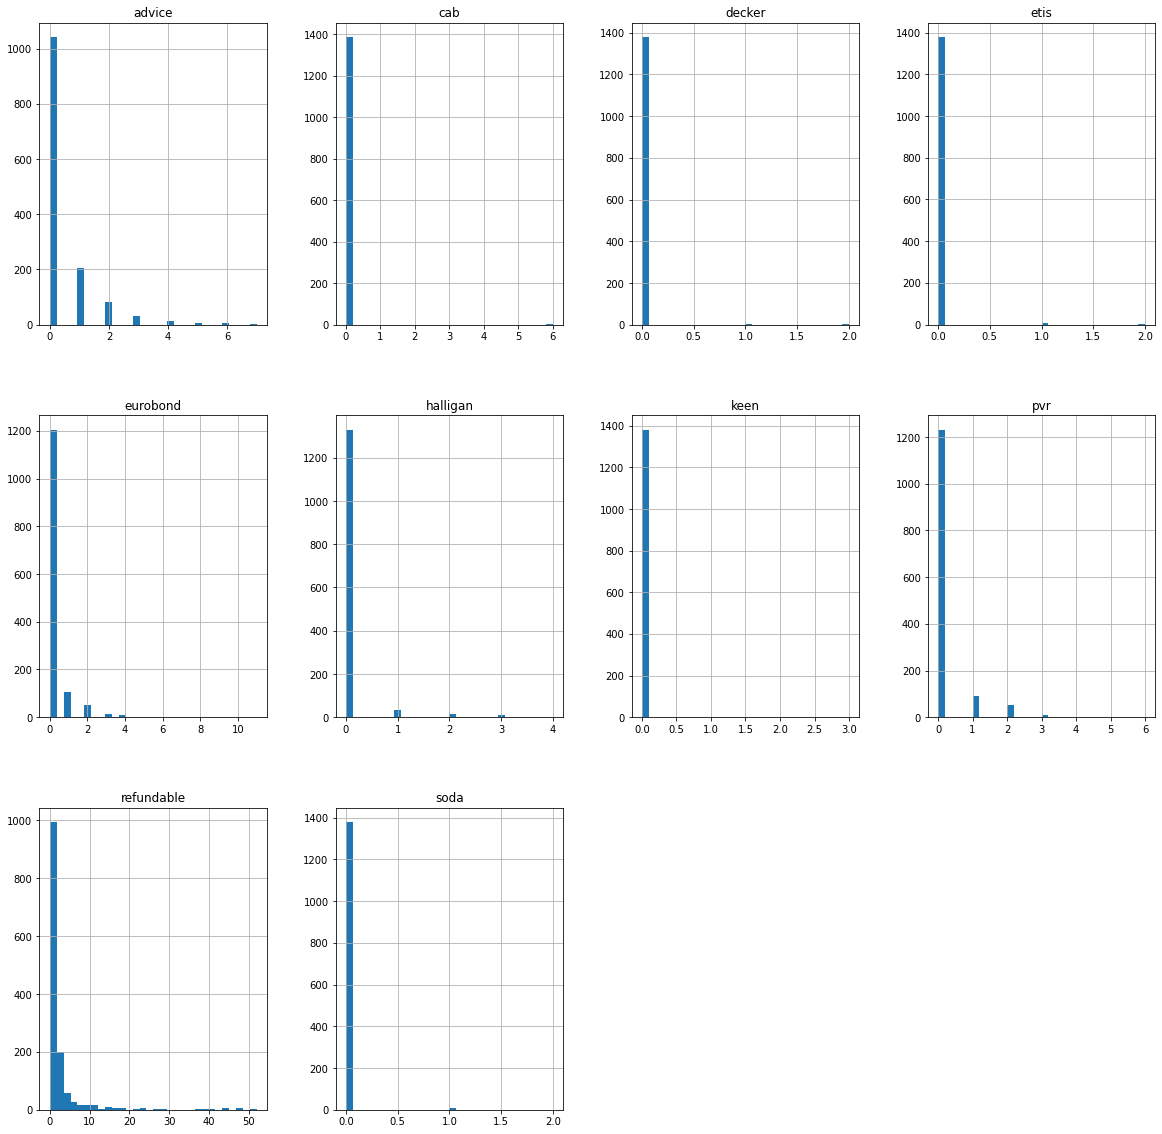

In [3]:
# Plot histograms to inspect variable distributions

data.hist(bins=30, figsize=(20, 20), layout=(3, 4))
plt.show()

In [4]:
data.nunique()

advice         8
cab            2
decker         3
etis           3
eurobond       7
halligan       5
keen           4
pvr            7
refundable    35
soda           3
dtype: int64

In [5]:
data.describe()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.427954,0.008646,0.007925,0.007925,0.219020,0.072767,0.009366,0.177954,2.336455,0.007925
std,0.940093,0.227675,0.110426,0.103691,0.695758,0.394309,0.144294,0.581526,6.151411,0.096488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,7.000000,6.000000,2.000000,2.000000,11.000000,4.000000,3.000000,6.000000,52.000000,2.000000


## Binarization

In [6]:
# set up a Binarizer:

binarizer = Binarizer(threshold=0).set_output(transform="pandas")

In [7]:
# fit to data

data_t = binarizer.fit_transform(data)

In [8]:
data_t.describe()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.249280,0.001441,0.005764,0.006484,0.131844,0.041787,0.005043,0.112392,0.505764,0.007205
std,0.432752,0.037946,0.075727,0.080292,0.338443,0.200174,0.070862,0.315962,0.500147,0.084604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


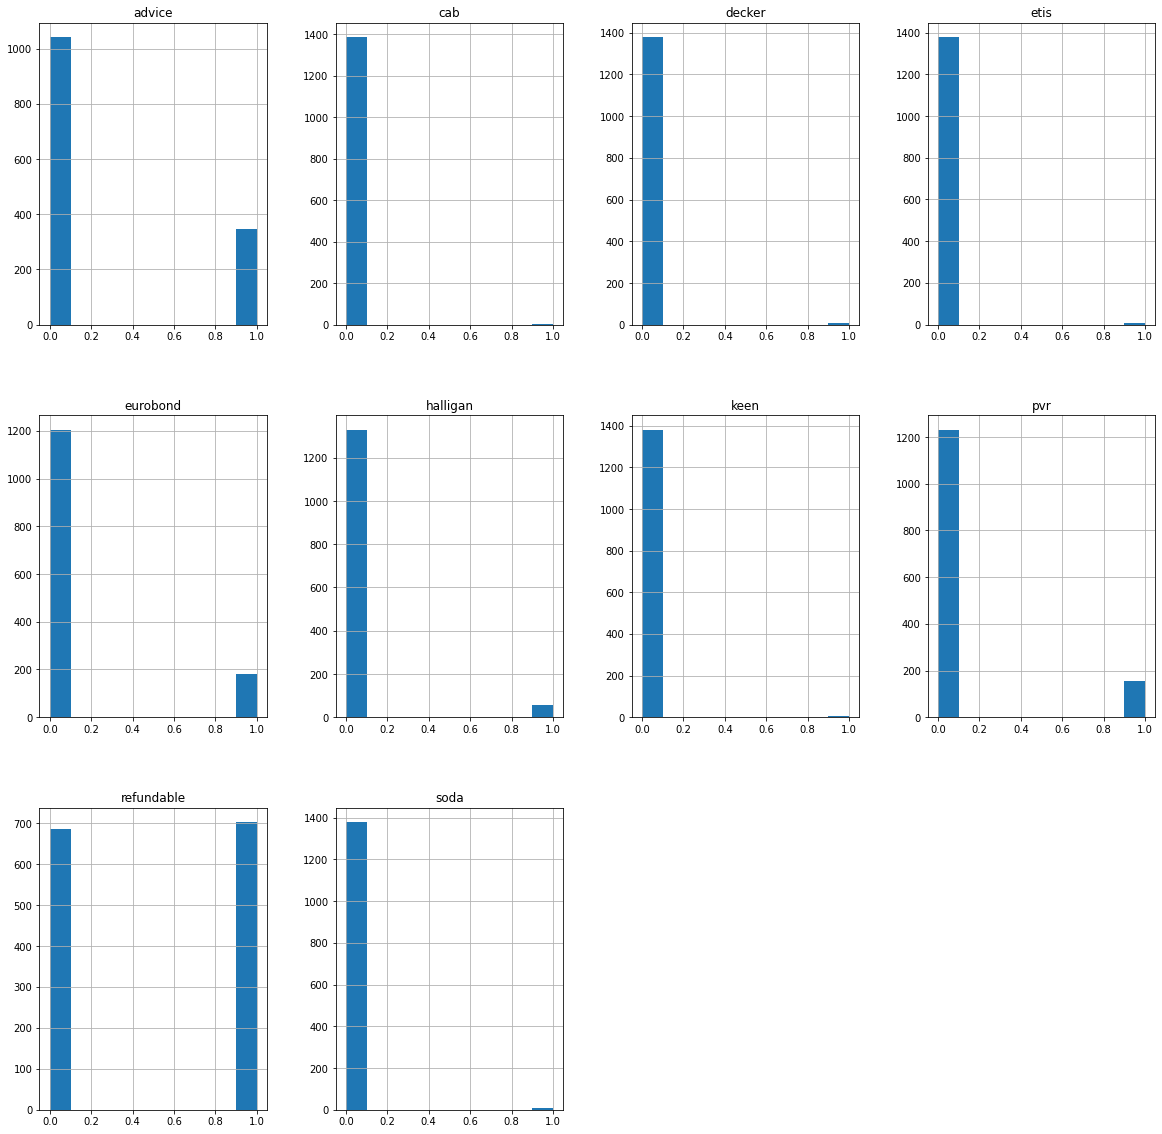

In [9]:
data_t.hist(figsize=(20, 20), layout=(3, 4))
plt.show()

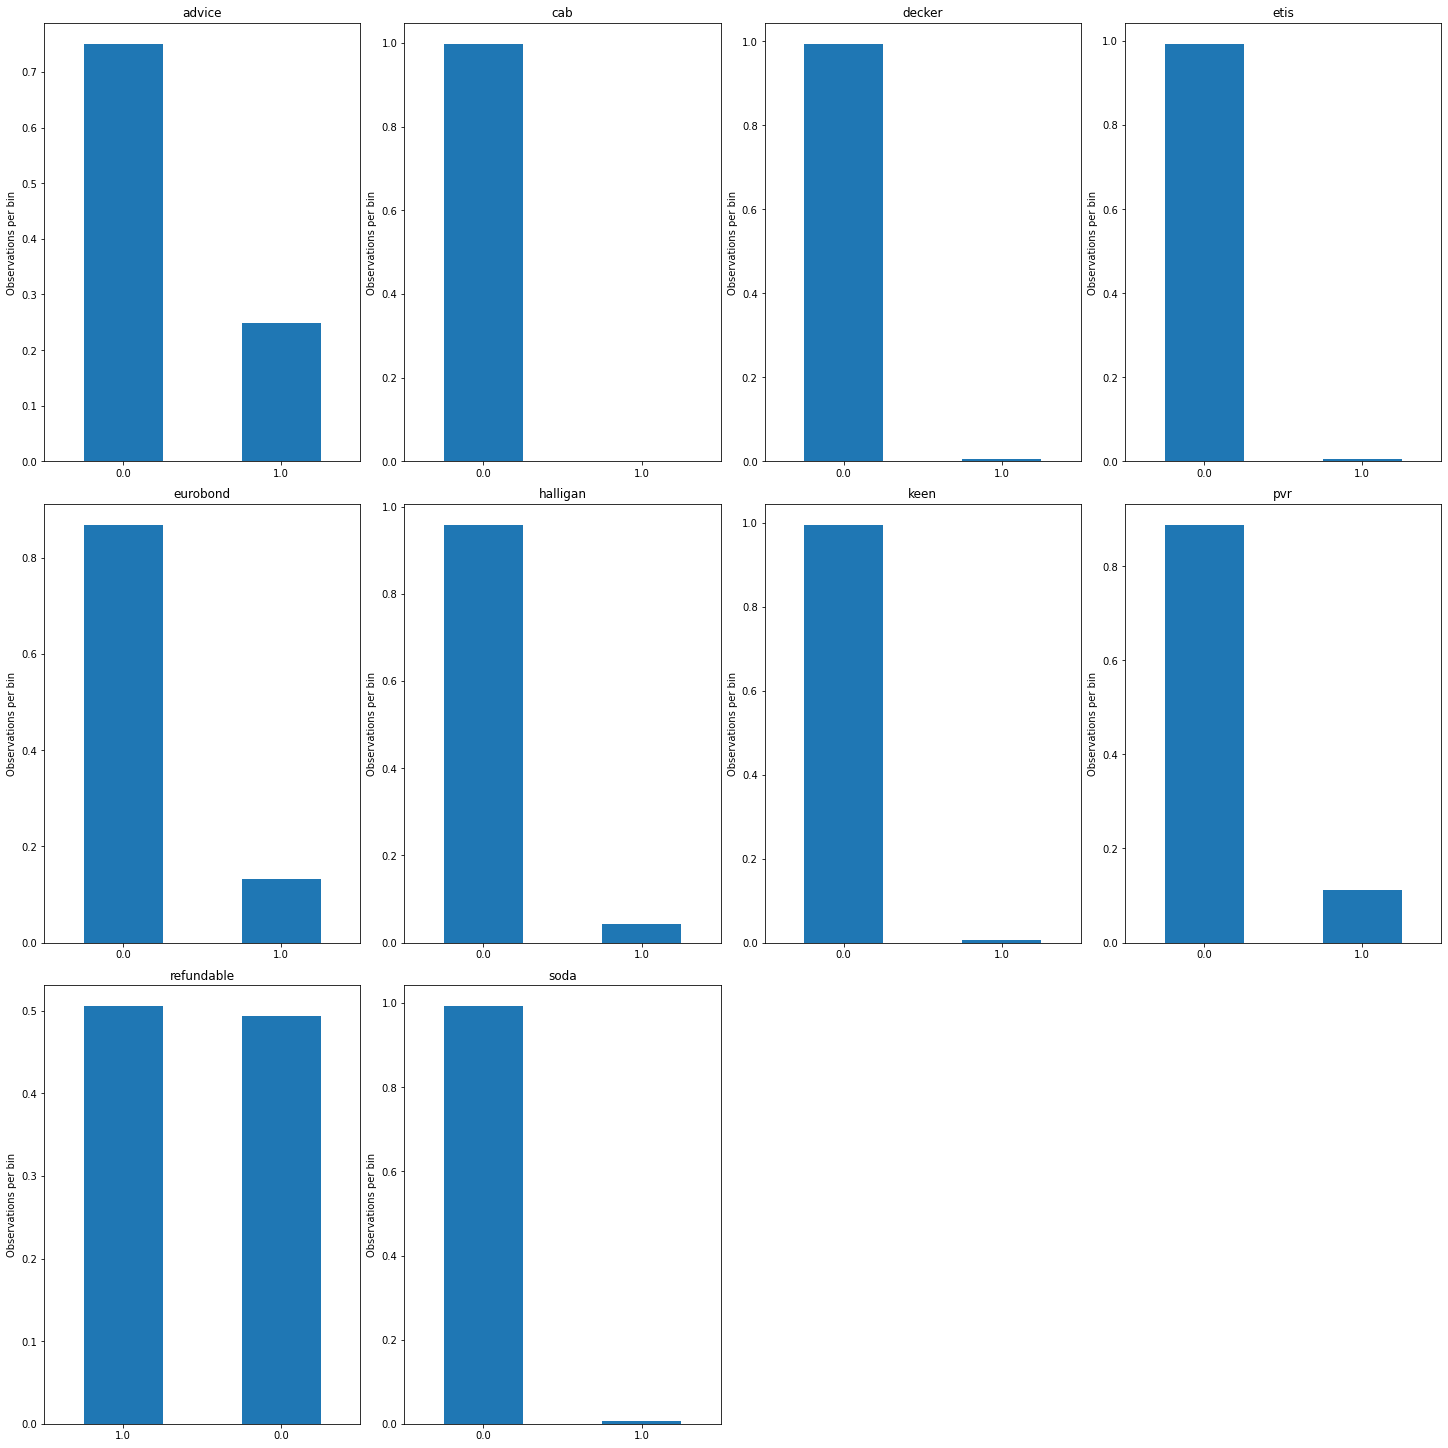

In [10]:
# Let's plot binarized variables:

variables = data_t.columns.to_list()

plt.figure(figsize=(20, 20), constrained_layout=True)

for i in range(10):

    # location in figure
    ax = plt.subplot(3, 4, i + 1)

    # variable to plot
    var = variables[i]

    # determine proportion of observations per bin
    t = data_t[var].value_counts(normalize=True)
    t.plot.bar(ax=ax)

    plt.xticks(rotation=0)
    plt.ylabel("Observations per bin")

    # add variable name as title
    ax.set_title(var)

plt.show()